# Exploratory Data Analysis (Part 2)

# 1. Setup

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime as dt
sns.set_style('whitegrid') # set style for visualization
warnings.filterwarnings('ignore')

# 2. Read Processed Data

In [2]:
%%time
grf_ap_left  = pd.read_csv('..\data\processed\grf_ap_left.csv')
grf_ap_right = pd.read_csv('..\data\processed\grf_ap_right.csv')
grf_ml_left  = pd.read_csv('..\data\processed\grf_ml_left.csv')
grf_ml_right = pd.read_csv('..\data\processed\grf_ml_right.csv')
grf_v_left   = pd.read_csv('..\data\processed\grf_v_left.csv')
grf_v_right  = pd.read_csv('..\data\processed\grf_v_right.csv')
cop_ml_left  = pd.read_csv('..\data\processed\cop_ml_left.csv')
cop_ml_right = pd.read_csv('..\data\processed\cop_ml_right.csv')
cop_ap_left  = pd.read_csv('..\data\processed\cop_ap_left.csv')
cop_ap_right = pd.read_csv('..\data\processed\cop_ap_right.csv')

CPU times: total: 16.3 s
Wall time: 18.8 s


In [3]:
# Labelling
label = pd.read_csv(r'..\data\GaitRec\GRF_metadata.csv')

In [4]:
grf_v_left.head()

,SUBJECT_ID,SESSION_ID,TRIAL_ID,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,510,413,1,0.023749,0.064212,0.132978,0.197432,0.254603,0.317527,0.394043,...,0.479860,0.398704,0.322715,0.257800,0.206161,0.157969,0.114536,0.078322,0.051086,0.030038
1,510,413,2,0.027479,0.084013,0.153125,0.213909,0.268096,0.340019,0.428372,...,0.444697,0.368860,0.299658,0.242390,0.193967,0.150712,0.109526,0.073994,0.048843,0.028040
2,510,413,3,0.026004,0.066777,0.122224,0.177144,0.231678,0.298016,0.372883,...,0.468087,0.389220,0.320403,0.257765,0.207438,0.159884,0.116295,0.077046,0.050402,0.028532
3,510,413,4,0.026241,0.080498,0.155492,0.234985,0.312395,0.401501,0.506381,...,0.450222,0.373759,0.305843,0.247477,0.200746,0.153727,0.111913,0.075615,0.050814,0.029449
4,510,413,6,0.027017,0.088312,0.164008,0.231150,0.289393,0.367465,0.463530,...,0.504436,0.422241,0.347770,0.280964,0.226931,0.175726,0.127687,0.084625,0.054879,0.030352


In [5]:
label.head()

,SUBJECT_ID,SESSION_ID,CLASS_LABEL,CLASS_LABEL_DETAILED,SEX,AGE,HEIGHT,BODY_WEIGHT,BODY_MASS,SHOE_SIZE,AFFECTED_SIDE,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE,SESSION_DATE,TRAIN,TRAIN_BALANCED,TEST
0,1,29885,HC,HC,1,18,173.0,516.1,52.6,42.0,NaN,1,0.0,2,0,1,29.01.2015,0,0,1
1,1,29886,HC,HC,1,18,173.0,516.2,52.6,42.0,NaN,1,0.0,1,0,1,29.01.2015,0,0,1
2,1,29888,HC,HC,1,18,173.0,516.1,52.6,42.0,NaN,1,0.0,3,0,1,29.01.2015,0,0,1
3,2,888812549,HC,HC,1,51,182.0,752.1,76.7,44.0,NaN,1,0.0,1,0,1,03.08.2017,1,0,0
4,2,888812550,HC,HC,1,51,182.0,752.4,76.7,44.0,NaN,1,0.0,3,0,1,03.08.2017,1,0,0


In [6]:
def calculate_BMI(height,weight):
    height_metres = height/100
    bmi=weight/(height_metres*height_metres)
    return bmi

In [7]:
calculate_BMI(173,52.6)

17.574927328009622

In [8]:
label['BMI']=label.apply(lambda x: calculate_BMI(x['HEIGHT'],x['BODY_MASS']), axis=1)

In [9]:
label.head()

,SUBJECT_ID,SESSION_ID,CLASS_LABEL,CLASS_LABEL_DETAILED,SEX,AGE,HEIGHT,BODY_WEIGHT,BODY_MASS,SHOE_SIZE,...,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE,SESSION_DATE,TRAIN,TRAIN_BALANCED,TEST,BMI
0,1,29885,HC,HC,1,18,173.0,516.1,52.6,42.0,...,1,0.0,2,0,1,29.01.2015,0,0,1,17.574927
1,1,29886,HC,HC,1,18,173.0,516.2,52.6,42.0,...,1,0.0,1,0,1,29.01.2015,0,0,1,17.574927
2,1,29888,HC,HC,1,18,173.0,516.1,52.6,42.0,...,1,0.0,3,0,1,29.01.2015,0,0,1,17.574927
3,2,888812549,HC,HC,1,51,182.0,752.1,76.7,44.0,...,1,0.0,1,0,1,03.08.2017,1,0,0,23.155416
4,2,888812550,HC,HC,1,51,182.0,752.4,76.7,44.0,...,1,0.0,3,0,1,03.08.2017,1,0,0,23.155416


# 3. Visualisation and statistics
1. Data statistics
2. Normalise GRF with Body weight, Merge on Subject ID
3. Normalise COP with stride length, Merge on Subject ID (Females: Height in inches multiplied by 0.413 equals stride length. Males: Height in inches multiplied by 0.415 equals stride length.)

<br>
According to the University of Iowa, the average person’s walking step length is 2.5 feet (30 inches), so the average stride length would be approximately 5 feet (60 inches).
There are a number of factors that can impact stride length including: 
<br>

* height
* age
* injury
* illness
* terrain

In [10]:
# count of data
print(f'{grf_v_left.shape}')
print(f'{grf_ap_left.shape}') 
print(f'{grf_ml_left.shape}') 
print(f'{cop_ap_left.shape}') 
print(f'{cop_ml_left.shape}')
print(f'{grf_v_right.shape}')
print(f'{grf_ap_right.shape}') 
print(f'{grf_ml_right.shape}') 
print(f'{cop_ap_right.shape}') 
print(f'{cop_ml_right.shape}') 
print(f'{label.shape}')

(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(75732, 103)
(8971, 21)


In [11]:
# How many GD and HC?
label.groupby(['CLASS_LABEL']).size()

CLASS_LABEL
A     2587
C     1676
H     1512
HC     810
K     2386
dtype: int64

In [12]:
label.columns

Index(['SUBJECT_ID', 'SESSION_ID', 'CLASS_LABEL', 'CLASS_LABEL_DETAILED',
       'SEX', 'AGE', 'HEIGHT', 'BODY_WEIGHT', 'BODY_MASS', 'SHOE_SIZE',
       'AFFECTED_SIDE', 'SHOD_CONDITION', 'ORTHOPEDIC_INSOLE', 'SPEED',
       'READMISSION', 'SESSION_TYPE', 'SESSION_DATE', 'TRAIN',
       'TRAIN_BALANCED', 'TEST', 'BMI'],
      dtype='object')

In [13]:
#Get list of subjects for each class
list_hc =  label.loc[label['CLASS_LABEL'] == 'HC']['SUBJECT_ID'].unique()
list_c =  label.loc[label['CLASS_LABEL'] == 'C']['SUBJECT_ID'].unique()
list_a =  label.loc[label['CLASS_LABEL'] == 'A']['SUBJECT_ID'].unique()
list_k =  label.loc[label['CLASS_LABEL'] == 'K']['SUBJECT_ID'].unique()
list_h =  label.loc[label['CLASS_LABEL'] == 'H']['SUBJECT_ID'].unique()


In [14]:
# Check classes do not overlap
label_hc =label.loc[label['SUBJECT_ID'].isin(list_hc)]
label_c =label.loc[label['SUBJECT_ID'].isin(list_c)]
label_a =label.loc[label['SUBJECT_ID'].isin(list_a)]
label_k =label.loc[label['SUBJECT_ID'].isin(list_k)]
label_h =label.loc[label['SUBJECT_ID'].isin(list_h)]
print(label_hc['CLASS_LABEL'].unique())
print(label_c['CLASS_LABEL'].unique())
print(label_a['CLASS_LABEL'].unique())
print(label_k['CLASS_LABEL'].unique())
print(label_h['CLASS_LABEL'].unique())

['HC']
['C']
['A']
['K']
['H']


In [15]:
## Understand health controls by categories
label.groupby(['CLASS_LABEL']).agg({
    'SEX': 'unique',
    'AFFECTED_SIDE':'unique', 
    'SHOD_CONDITION':'unique', 
    'ORTHOPEDIC_INSOLE':'unique', 
    'SPEED':'unique',
    'READMISSION':'unique', 
    'SESSION_TYPE':'unique'
})

,SEX,AFFECTED_SIDE,SHOD_CONDITION,ORTHOPEDIC_INSOLE,SPEED,READMISSION,SESSION_TYPE
CLASS_LABEL,,,,,,,
A,"[1, 0]","[2.0, 1.0, 0.0]","[1, 2, 0]","[0.0, 1.0, nan]",[2],"[0, 1, 2]","[1, 2, 3]"
C,"[1, 0]","[1.0, 2.0, 0.0]","[1, 2, 0]","[0.0, 1.0, nan]",[2],"[0, 1, 2, 3]","[1, 2, 3]"
H,"[1, 0]","[1.0, 0.0, 2.0]","[1, 0, 2]","[0.0, 1.0, nan]",[2],"[0, 1, 2]","[1, 2, 3]"
HC,"[1, 0]",[nan],"[1, 0]",[0.0],"[2, 1, 3]",[0],[1]
K,"[1, 0]","[1.0, 0.0, 2.0]","[1, 0, 2]","[0.0, 1.0, nan]",[2],"[0, 1, 2, 3]","[2, 1, 3]"


In [16]:
## Understand health controls by numerical 
label.groupby(['SEX','CLASS_LABEL']).agg({
    'AGE': ['min','mean','max'],
    'HEIGHT': ['min','mean','max'],
    'BODY_MASS':['min','mean','max'],
    'BMI': ['min','mean','max'],
    'SHOE_SIZE': ['min','mean','max'],
})

AGE                HEIGHT                    BODY_MASS  \
                min       mean max    min        mean    max       min   
SEX CLASS_LABEL                                                          
0   A            14  41.615063  65  154.0  167.502732  187.0      45.4   
    C            20  40.921348  59  158.0  168.291139  176.0      47.6   
    H            17  46.141791  70  153.0  165.822222  178.0      38.5   
    HC           15  34.832536  67  152.0  167.102871  183.0      41.3   
    K            15  41.666667  74  150.0  167.697368  188.0      47.4   
1   A            15  41.439071  71  160.0  178.103059  198.0      51.0   
    C            16  44.465287  68  165.0  178.811665  196.0      51.3   
    H            14  42.012862  74  165.0  178.440945  196.0      53.1   
    HC           17  34.931122  78  163.0  179.176020  192.0      52.6   
    K             9  41.058898  80  145.0  179.212719  202.0      47.8   

                                         BMI                       SHOE_SIZE  \
                      mean    max        min       mean        max       min   
SEX CLASS_LABEL                                                                
0   A            74.012343  123.4  17.128028  26.160547  48.203125      36.0   
    C            71.007303  110.3  18.557328  24.979803  33.094582      37.0   
    H            66.552985  110.3  18.738846  24.660468  37.557528      36.0   
    HC           66.090670  108.1  17.190427  23.703319  40.546875      36.0   
    K            71.185626  139.2  16.512346  25.709841  41.046996      35.0   
1   A            89.979753  165.2  17.080235  28.224183  47.241843      38.0   
    C            86.093725  143.0  15.819345  26.919857  39.242870      40.0   
    H            85.572669  137.0  17.716049  26.849480  45.465954      40.0   
    HC           82.053571  143.2  17.574927  25.541725  43.035183      39.0   
    K            89.673401  170.0  16.238378  28.007281  51.294755      40.0   

                                  
                      mean   max  
SEX CLASS_LABEL                   
0   A            39.207182  45.0  
    C            39.316456  42.0  
    H            38.377778  42.0  
    HC           38.614833  43.0  
    K            39.180682  42.0  
1   A            43.165110  47.0  
    C            43.422046  49.0  
    H            43.317965  47.0  
    HC           43.321429  48.0  
    K            43.557650  50.0

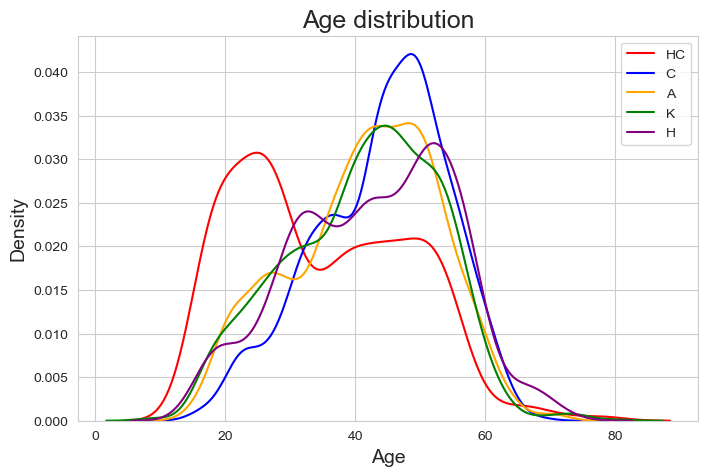

In [17]:
#What is the age distribution between GD and HC?
plt.figure(figsize=(8,5))
sns.distplot(label_hc['AGE'],color='r',hist=False,label='HC')
sns.distplot(label_c['AGE'],color='b',hist=False,label='C')
sns.distplot(label_a['AGE'],color='orange',hist=False,label='A')
sns.distplot(label_k['AGE'],color='g',hist=False,label='K')
sns.distplot(label_h['AGE'],color='purple',hist=False,label='H')
plt.legend()
plt.title('Age distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Density',size=14)
plt.show()

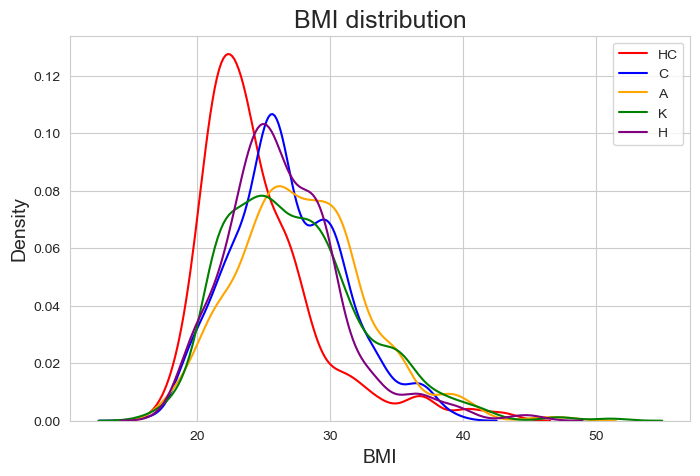

In [18]:
#What is the BMI distribution? 
plt.figure(figsize=(8,5))
sns.distplot(label_hc['BMI'],color='r',hist=False,label='HC')
sns.distplot(label_c['BMI'],color='b',hist=False,label='C')
sns.distplot(label_a['BMI'],color='orange',hist=False,label='A')
sns.distplot(label_k['BMI'],color='g',hist=False,label='K')
sns.distplot(label_h['BMI'],color='purple',hist=False,label='H')
plt.legend()
plt.title('BMI distribution',size=18)
plt.xlabel('BMI',size=14)
plt.ylabel('Density',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

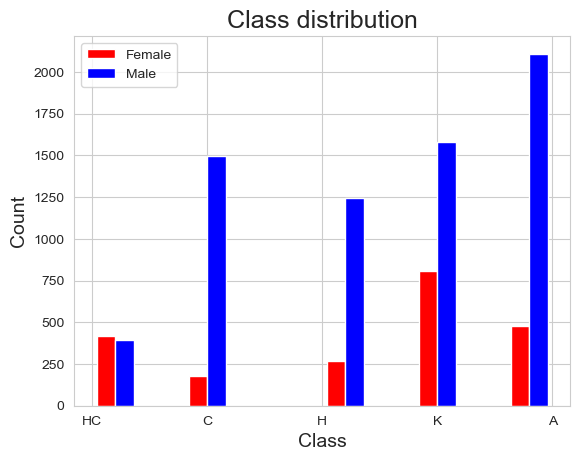

In [47]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['SEX'] == 0]['CLASS_LABEL']
y2 = label.loc[label['SEX'] == 1]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y1,y2],color=['r','b'],label=['Female','Male'])
plt.title('Class distribution',size=18)
plt.legend()
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

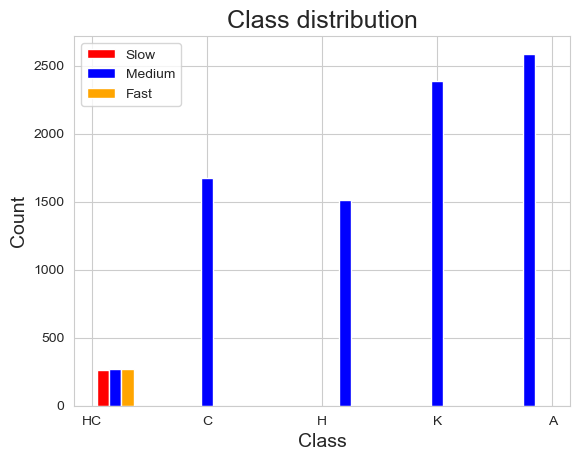

In [48]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['SPEED'] == 1]['CLASS_LABEL']
y2 = label.loc[label['SPEED'] == 2]['CLASS_LABEL']
y3 = label.loc[label['SPEED'] == 3]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y1,y2,y3],color=['r','b','orange'],label=['Slow','Medium','Fast'])
plt.title('Class distribution',size=18)
plt.legend()
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

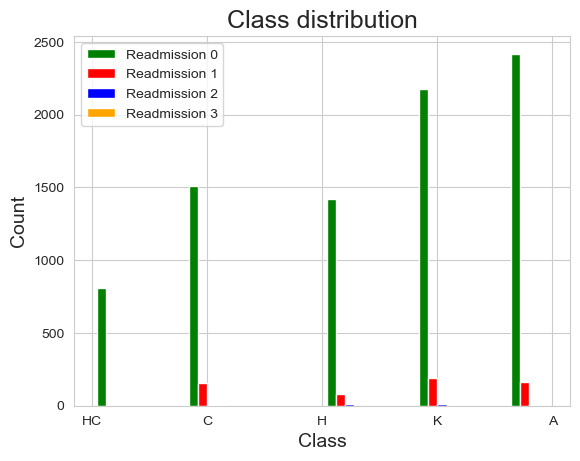

In [50]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['READMISSION'] == 1]['CLASS_LABEL']
y2 = label.loc[label['READMISSION'] == 2]['CLASS_LABEL']
y3 = label.loc[label['READMISSION'] == 3]['CLASS_LABEL']
y0 = label.loc[label['READMISSION'] == 0]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y0,y1,y2,y3],color=['g','r','b','orange'],label=['Readmission 0','Readmission 1','Readmission 2','Readmission 3'])
plt.title('Class distribution',size=18)
plt.legend()
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

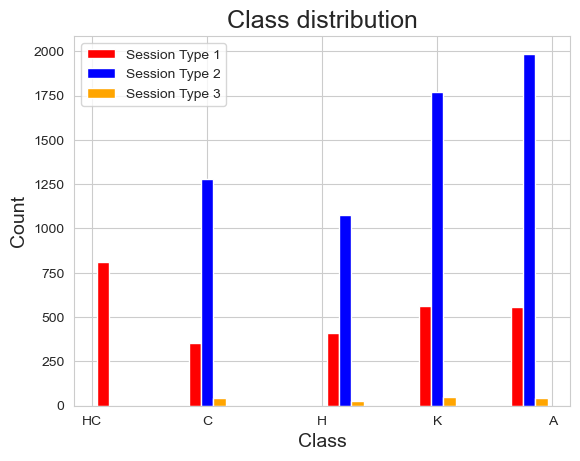

In [51]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['SESSION_TYPE'] == 1]['CLASS_LABEL']
y2 = label.loc[label['SESSION_TYPE'] == 2]['CLASS_LABEL']
y3 = label.loc[label['SESSION_TYPE'] == 3]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y1,y2,y3],color=['r','b','orange'],label=['Session Type 1','Session Type 2','Session Type 3'])
plt.legend()
plt.title('Class distribution',size=18)
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

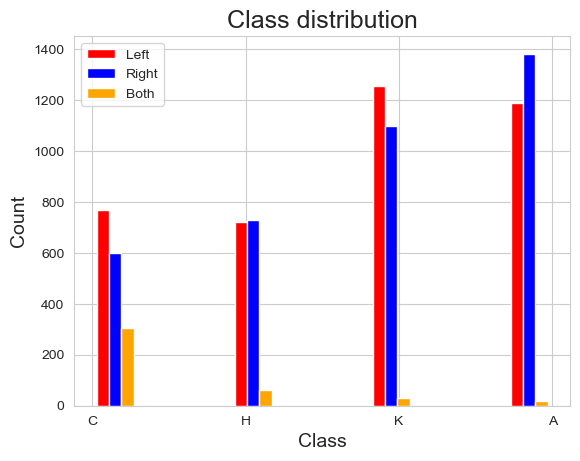

In [53]:
plt.figure(figsize=(10,6))
y1 = label.loc[label['AFFECTED_SIDE'] == 0]['CLASS_LABEL']
y2 = label.loc[label['AFFECTED_SIDE'] == 1]['CLASS_LABEL']
y3 = label.loc[label['AFFECTED_SIDE'] == 2]['CLASS_LABEL']
fig, ax1 = plt.subplots()
ax1.hist([y1,y2,y3],color=['r','b','orange'],label=['Left','Right','Both'])
plt.legend()
plt.title('Class distribution',size=18)
plt.xlabel('Class',size=14)
plt.ylabel('Count',size=14)
plt.show()

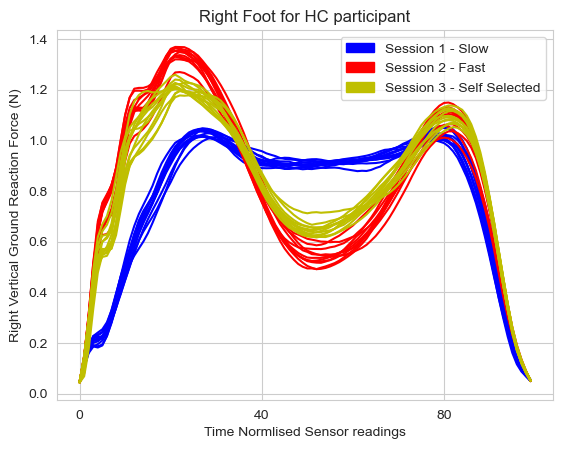

In [35]:
p1 = grf_v_right.loc[(grf_v_right.SUBJECT_ID == 210) & (grf_v_right.SESSION_ID == 30207) , grf_v_right.columns[3:]]
p3 = grf_v_right.loc[(grf_v_right.SUBJECT_ID == 210) & (grf_v_right.SESSION_ID == 30206) , grf_v_right.columns[3:]]
p2 = grf_v_right.loc[(grf_v_right.SUBJECT_ID == 210) & (grf_v_right.SESSION_ID == 30208) , grf_v_right.columns[3:]]

# Plot
for i in range(0,len(p1)):
    p1.iloc[i].plot(color='b')
    session1 = mpatches.Patch(color='b', label='Session 1 - Slow')
for i in range(0,len(p2)):
    p2.iloc[i].plot(color='r')
    session2 = mpatches.Patch(color='r', label='Session 2 - Fast')
for i in range(0,len(p3)):
    p3.iloc[i].plot(color='y')
    session3 = mpatches.Patch(color='y', label='Session 3 - Self Selected')
plt.legend(loc="upper right",handles=[session1, session2, session3])
plt.title('Right Foot for HC participant')
plt.xlabel('Time Normlised Sensor readings')
plt.locator_params(axis="x", nbins=5)
plt.ylabel('Right Vertical Ground Reaction Force (N)')
plt.show()

In [ ]:
#df.merge(df_label[['SUBJECT_ID','SESSION_ID',column]], how='inner', on=['SUBJECT_ID','SESSION_ID'])
#df_merged.loc[:, cols] = df_merged.loc[:, cols].div(df_merged[column], axis=0)
#grf_ap_left_n[grf_ap_left_n.columns[3:]].head().transpose().plot()